# 1. Library

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.1.1       √ purrr   0.3.2  
√ tibble  2.1.1       √ dplyr   0.8.0.1
√ tidyr   0.8.3       √ stringr 1.4.0  
√ readr   1.3.1       √ forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# 2. Data Loading

In [2]:
cust <- read.csv("./01. data/BGCON_CUST_DATA.csv", fileEncoding = "UTF-16")
cntt <- read.csv("./01. data/BGCON_CNTT_DATA.csv", fileEncoding = "UTF-16")
claim <- read.csv("./01. data/BGCON_CLAIM_DATA.csv", fileEncoding = "UTF-16")

In [3]:
cust <- filter(cust, DIVIDED_SET == 1)
cust_te <- filter(cust, DIVIDED_SET == 2)

In [4]:
claim <- arrange(claim, CUST_ID)

# 3. Data Setting

In [5]:
data <- select(cust, CUST_ID, SIU_CUST_YN)

# 4. Claim Count

In [6]:
claim_count <- claim %>% group_by(CUST_ID) %>% summarise(CLAIM_COUNT = n())
data <- merge(data, claim_count, key="CUST_ID")

In [7]:
head(data)

CUST_ID,SIU_CUST_YN,CLAIM_COUNT
1,N,4
2,N,3
3,N,1
4,N,9
5,N,1
6,N,3


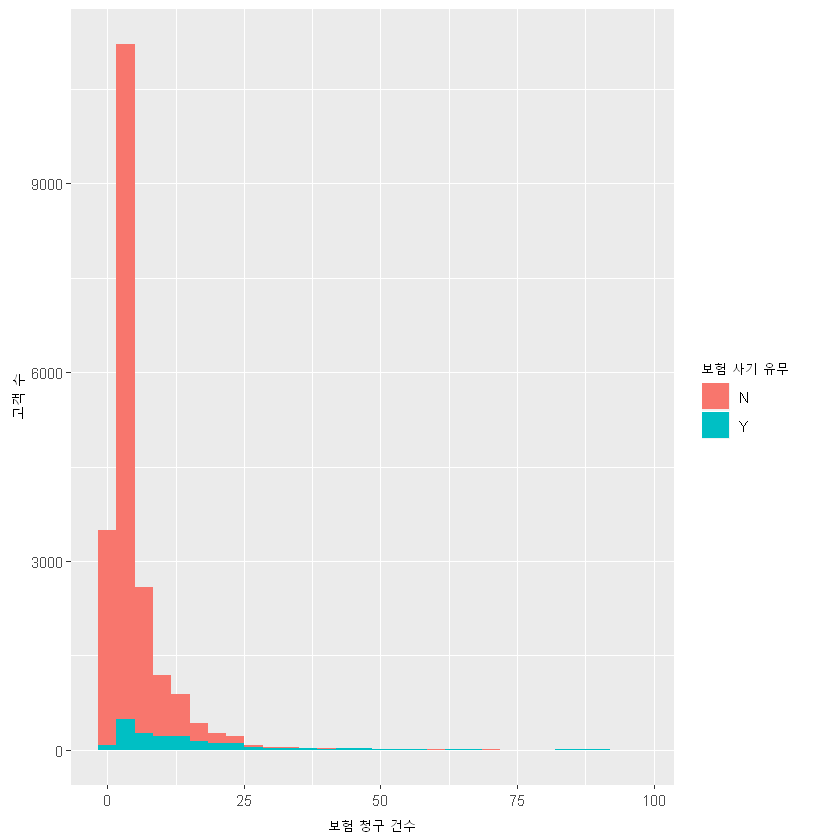

In [8]:
data %>% ggplot(aes(x=CLAIM_COUNT, fill=SIU_CUST_YN)) + geom_histogram(bins = 30) + 
labs(fill = "보험 사기 유무", x = "보험 청구 건수", y = "고객 수")